# Project: Analyzing Hospital No-Shows in Brazil

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

This project analyzes no-shows in hospitals in Brazil.  It looks at whether there are any correlations between no-shows and gender, neighborhood, age and day of the week. It also investigates how the no-shows are distributed across patients (i.e. whether some patients make up the majority of the no-shows).

In [131]:
# These are the packages I plan to use.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

### General Properties
In the following section, I am getting a general idea of what is contained in data.

In [132]:
# Load data and look at head to get an idea of what is contained in data.
df = pd.read_csv('noshow.csv')

df.head(50)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589980e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262960e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679510e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841190e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
5,9.598510e+13,5626772,F,2016-04-27T08:36:51Z,2016-04-29T00:00:00Z,76,REPÚBLICA,0,1,0,0,0,0,No
6,7.336880e+14,5630279,F,2016-04-27T15:05:12Z,2016-04-29T00:00:00Z,23,GOIABEIRAS,0,0,0,0,0,0,Yes
7,3.449830e+12,5630575,F,2016-04-27T15:39:58Z,2016-04-29T00:00:00Z,39,GOIABEIRAS,0,0,0,0,0,0,Yes
8,5.639470e+13,5638447,F,2016-04-29T08:02:16Z,2016-04-29T00:00:00Z,21,ANDORINHAS,0,0,0,0,0,0,No
9,7.812460e+13,5629123,F,2016-04-27T12:48:25Z,2016-04-29T00:00:00Z,19,CONQUISTA,0,0,0,0,0,0,No


In [133]:
df.tail(50)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
110477,2.798490e+13,5673472,F,2016-05-09T09:24:09Z,2016-06-06T00:00:00Z,67,RESISTÊNCIA,0,0,1,0,0,1,No
110478,5.478500e+12,5671780,F,2016-05-09T07:11:08Z,2016-06-06T00:00:00Z,27,RESISTÊNCIA,0,0,0,0,0,1,No
110479,4.455240e+12,5638153,F,2016-04-29T07:45:43Z,2016-06-06T00:00:00Z,34,RESISTÊNCIA,1,0,0,0,0,1,Yes
110480,3.492930e+11,5606687,F,2016-04-20T10:33:54Z,2016-06-06T00:00:00Z,51,RESISTÊNCIA,0,0,0,0,0,1,No
110481,4.383630e+11,5685319,F,2016-05-11T10:08:44Z,2016-06-06T00:00:00Z,28,RESISTÊNCIA,0,0,0,0,0,1,No
110482,5.944230e+14,5639147,F,2016-04-29T08:45:44Z,2016-06-06T00:00:00Z,43,RESISTÊNCIA,1,0,0,0,0,1,Yes
110483,1.642780e+12,5769404,F,2016-06-03T08:47:58Z,2016-06-03T00:00:00Z,60,PRAIA DO CANTO,0,1,0,0,0,0,No
110484,5.133650e+14,5772155,F,2016-06-03T14:43:56Z,2016-06-07T00:00:00Z,45,BARRO VERMELHO,0,0,0,0,0,0,Yes
110485,4.865330e+12,5762486,F,2016-06-02T07:49:14Z,2016-06-06T00:00:00Z,34,SANTA LUÍZA,0,0,0,0,0,0,No
110486,3.184150e+14,5788099,F,2016-06-08T11:14:23Z,2016-06-08T00:00:00Z,60,MARIA ORTIZ,0,0,0,0,0,0,No


In [134]:
# Look at number of columns and rows.
df.shape

(110527, 14)

In [135]:
# Look at some standard info about each column.
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.920000e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172615e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173180e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439170e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999820e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [136]:
# Look at data types.  Notice the format of the 'Scheduled Day' and 'Appointment Day' columns.
df.dtypes 

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object

In [137]:
# Look at how many no-shows ('Yes' values) there are for appointments
df['No-show'].value_counts()

No     88208
Yes    22319
Name: No-show, dtype: int64

In [138]:
# Observe that there are 81 unique neighborhoods.
df['Neighbourhood'].value_counts()

JARDIM CAMBURI                 7717
MARIA ORTIZ                    5805
RESISTÊNCIA                    4431
JARDIM DA PENHA                3877
ITARARÉ                        3514
CENTRO                         3334
TABUAZEIRO                     3132
SANTA MARTHA                   3131
JESUS DE NAZARETH              2853
BONFIM                         2773
SANTO ANTÔNIO                  2746
SANTO ANDRÉ                    2571
CARATOÍRA                      2565
JABOUR                         2509
SÃO PEDRO                      2448
ILHA DO PRÍNCIPE               2266
NOVA PALESTINA                 2264
ANDORINHAS                     2262
DA PENHA                       2217
ROMÃO                          2215
GURIGICA                       2018
SÃO JOSÉ                       1977
BELA VISTA                     1907
MARUÍPE                        1902
FORTE SÃO JOÃO                 1889
ILHA DE SANTA MARIA            1885
SÃO CRISTÓVÃO                  1836
REDENÇÃO                    

In [139]:
# Notice that there are only 61744 unique rows
# compared to the 110527 in when looking at the dataframe's 'shape'.
# This makes sense, though, and means that there are duplicates.
# In other words, some patients make multiple appointments.
df['PatientId'].nunique()

61744

In [140]:
# Notice frequency of some of the patients in requesting appointments.
df['PatientId'].value_counts()

8.221460e+14    88
9.963767e+10    84
2.688610e+13    70
3.353480e+13    65
7.579750e+13    62
8.713750e+14    62
2.584240e+11    62
6.264200e+12    62
6.684490e+13    57
8.722790e+11    55
8.923970e+13    54
8.435224e+09    51
8.534400e+14    50
6.543360e+13    46
1.448000e+13    46
9.452750e+12    42
8.189450e+13    42
1.882320e+14    40
2.271580e+12    38
9.496200e+12    38
1.336490e+13    37
1.484140e+12    35
9.861630e+14    34
8.883500e+13    34
7.124590e+14    33
4.167560e+14    30
6.128880e+12    30
8.121400e+13    29
8.634160e+12    24
1.198160e+12    24
                ..
8.173600e+12     1
9.291860e+14     1
6.318970e+13     1
3.773340e+13     1
5.712280e+14     1
6.538840e+13     1
4.661870e+12     1
3.489310e+13     1
2.852380e+13     1
4.296170e+12     1
1.523490e+11     1
6.125220e+14     1
8.512140e+12     1
1.338260e+11     1
6.636470e+14     1
9.456530e+14     1
5.715820e+14     1
3.662900e+13     1
2.829760e+13     1
7.896120e+14     1
1.218840e+12     1
1.516130e+14

In [141]:
# Get idea of how often a patient requests an appointment.
df['PatientId'].value_counts().describe()

count    61744.000000
mean         1.790085
std          1.785722
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max         88.000000
Name: PatientId, dtype: float64

### Data Cleaning

After getting an idea of some of the information presented in the data set, in the following section I will clean the data. This involves looking for duplicates and null values and editing column names.

In [142]:
# Observe that there are no duplicate rows.
df.duplicated().sum()

0

In [143]:
# Just making sure there are no duplicates in this column
# since all of these values should be unique.
df.AppointmentID.duplicated().sum()

0

In [144]:
# Observe that there are no missing values.
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In [145]:
# Editing some of the column names for spelling correction and 
# standardization (i.e. all lowercase and use of underscores).
df.rename(columns={'PatientId': 'patient_id', 'AppointmentID': 'appointment_id', 'ScheduledDay': 'scheduled_day', 'AppointmentDay': 'appointment_day', 'Neighbourhood': 'neighborhood', 'Hipertension': 'hypertension', 'Handcap': 'handicap', 'No-show': 'no_show'}, inplace=True)
df.rename(columns=lambda x: x.lower(), inplace=True)

# Confirm changes.
df.head(1)

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighborhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No


In [146]:
# Confirm changes above.
df.head(1)

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighborhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No


<a id='eda'></a>
## Exploratory Data Analysis


Above, I've cleaned the data.  Below, I'm going to look at some variables to see whether there is any correlation between them and no-shows.

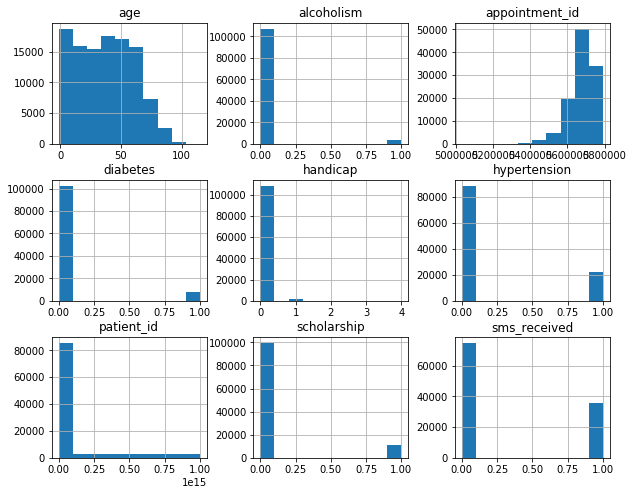

In [147]:
# Getting a prelminary idea of relationships between variables.

df.hist(figsize=(10, 8));

### Research Question 1
Is there a correlation between genders and no-shows?

In [148]:
# I want to start by looking at the breakdown of gender.
# Observe that there are many more females than males in this dataset.
df['gender'].value_counts()

F    71840
M    38687
Name: gender, dtype: int64

In [149]:
# I want to look at the relationship between the variables of gender 
# and no-shows. I begin by creating two masks--one for those who showed up 
# and another for those who didnt.
did_not_show = df.no_show == 'Yes'
showed = df.no_show == 'No'

In [150]:
# Looking at the breakdown of gender among the no-shows.
df.gender[did_not_show].value_counts()

F    14594
M     7725
Name: gender, dtype: int64

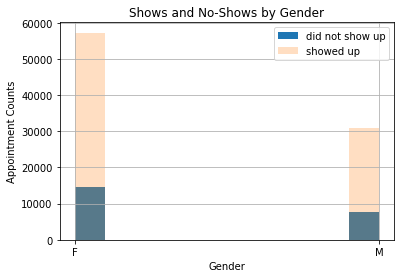

In [151]:
# Visually displaying shows and no-shows for each gender.
# Observe that females make up a larger proprotion of the no-shows, but
# there are also a significantly larger number of females in this dataset 
# compared to males.
df.gender[did_not_show].hist(alpha=1, label='did not show up');
df.gender[showed].hist(alpha=0.25, label='showed up')
plt.xlabel("Gender")
plt.ylabel("Appointment Counts")
plt.title ("Shows and No-Shows by Gender")
plt.legend();

### Research Question 2
From which neighborhoods do most no-shows come from?

In [152]:
# I want to make a bar chart that displays the counts of no-shows for each
# neighborhood.  To get these counts, I will replace the values of the
# no-show column from 'Yes' to 1 and 'No' to 0.
df['no_show'] = df['no_show'].replace(['Yes'], 1)
df['no_show'] = df['no_show'].replace(['No'], 0)


In [153]:
# Ensuring that changes above took place.
df.head(20)

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighborhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,0
1,5.589980e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,0
2,4.262960e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,0
3,8.679510e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0
4,8.841190e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,0
5,9.598510e+13,5626772,F,2016-04-27T08:36:51Z,2016-04-29T00:00:00Z,76,REPÚBLICA,0,1,0,0,0,0,0
6,7.336880e+14,5630279,F,2016-04-27T15:05:12Z,2016-04-29T00:00:00Z,23,GOIABEIRAS,0,0,0,0,0,0,1
7,3.449830e+12,5630575,F,2016-04-27T15:39:58Z,2016-04-29T00:00:00Z,39,GOIABEIRAS,0,0,0,0,0,0,1
8,5.639470e+13,5638447,F,2016-04-29T08:02:16Z,2016-04-29T00:00:00Z,21,ANDORINHAS,0,0,0,0,0,0,0
9,7.812460e+13,5629123,F,2016-04-27T12:48:25Z,2016-04-29T00:00:00Z,19,CONQUISTA,0,0,0,0,0,0,0


''

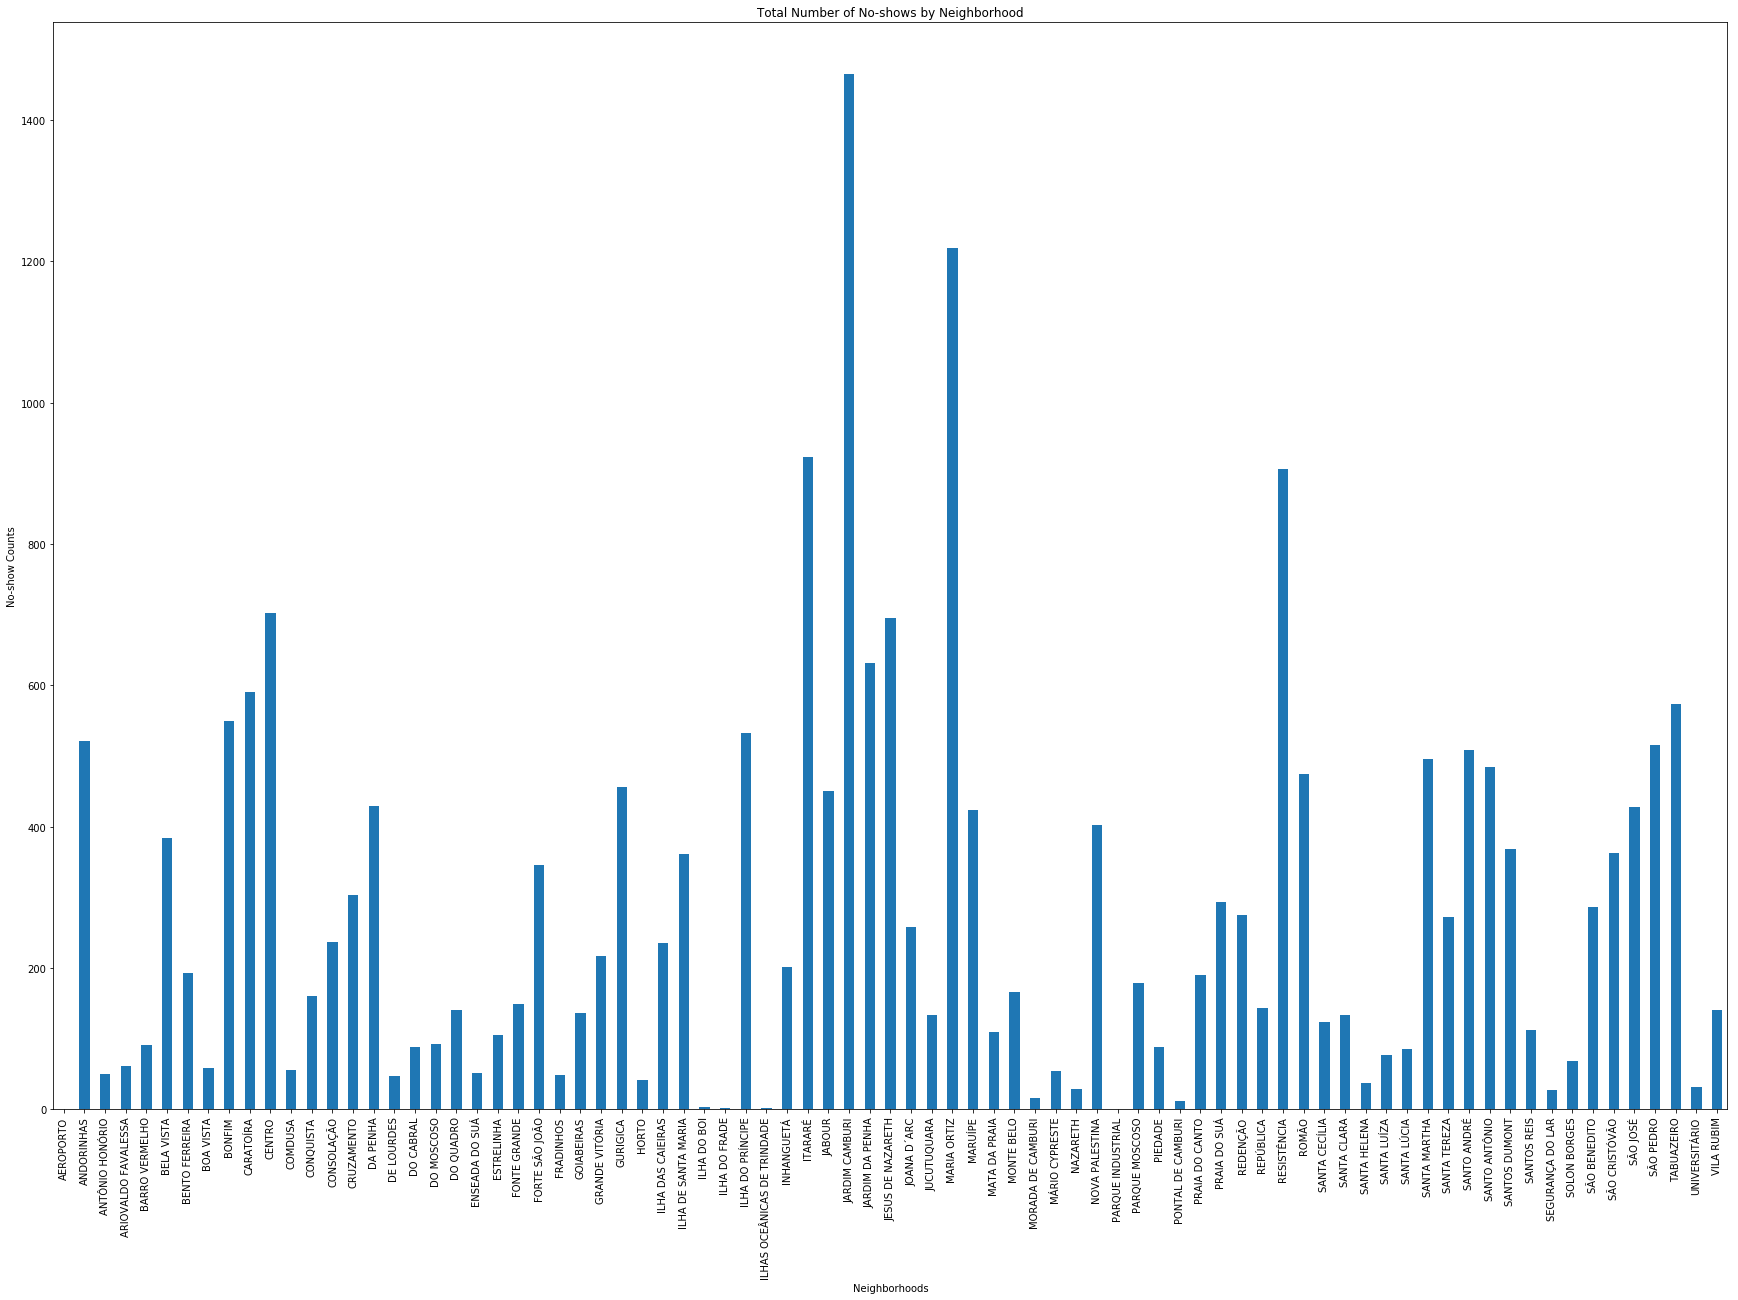

In [154]:
# Creating the bar chart.
ax = df.groupby('neighborhood')['no_show'].sum().plot(kind='bar', 
                                                      title='Total Number of No-shows by Neighborhood', figsize=(30,20))
ax.set_xlabel('Neighborhoods')
ax.set_ylabel('No-show Counts')
;

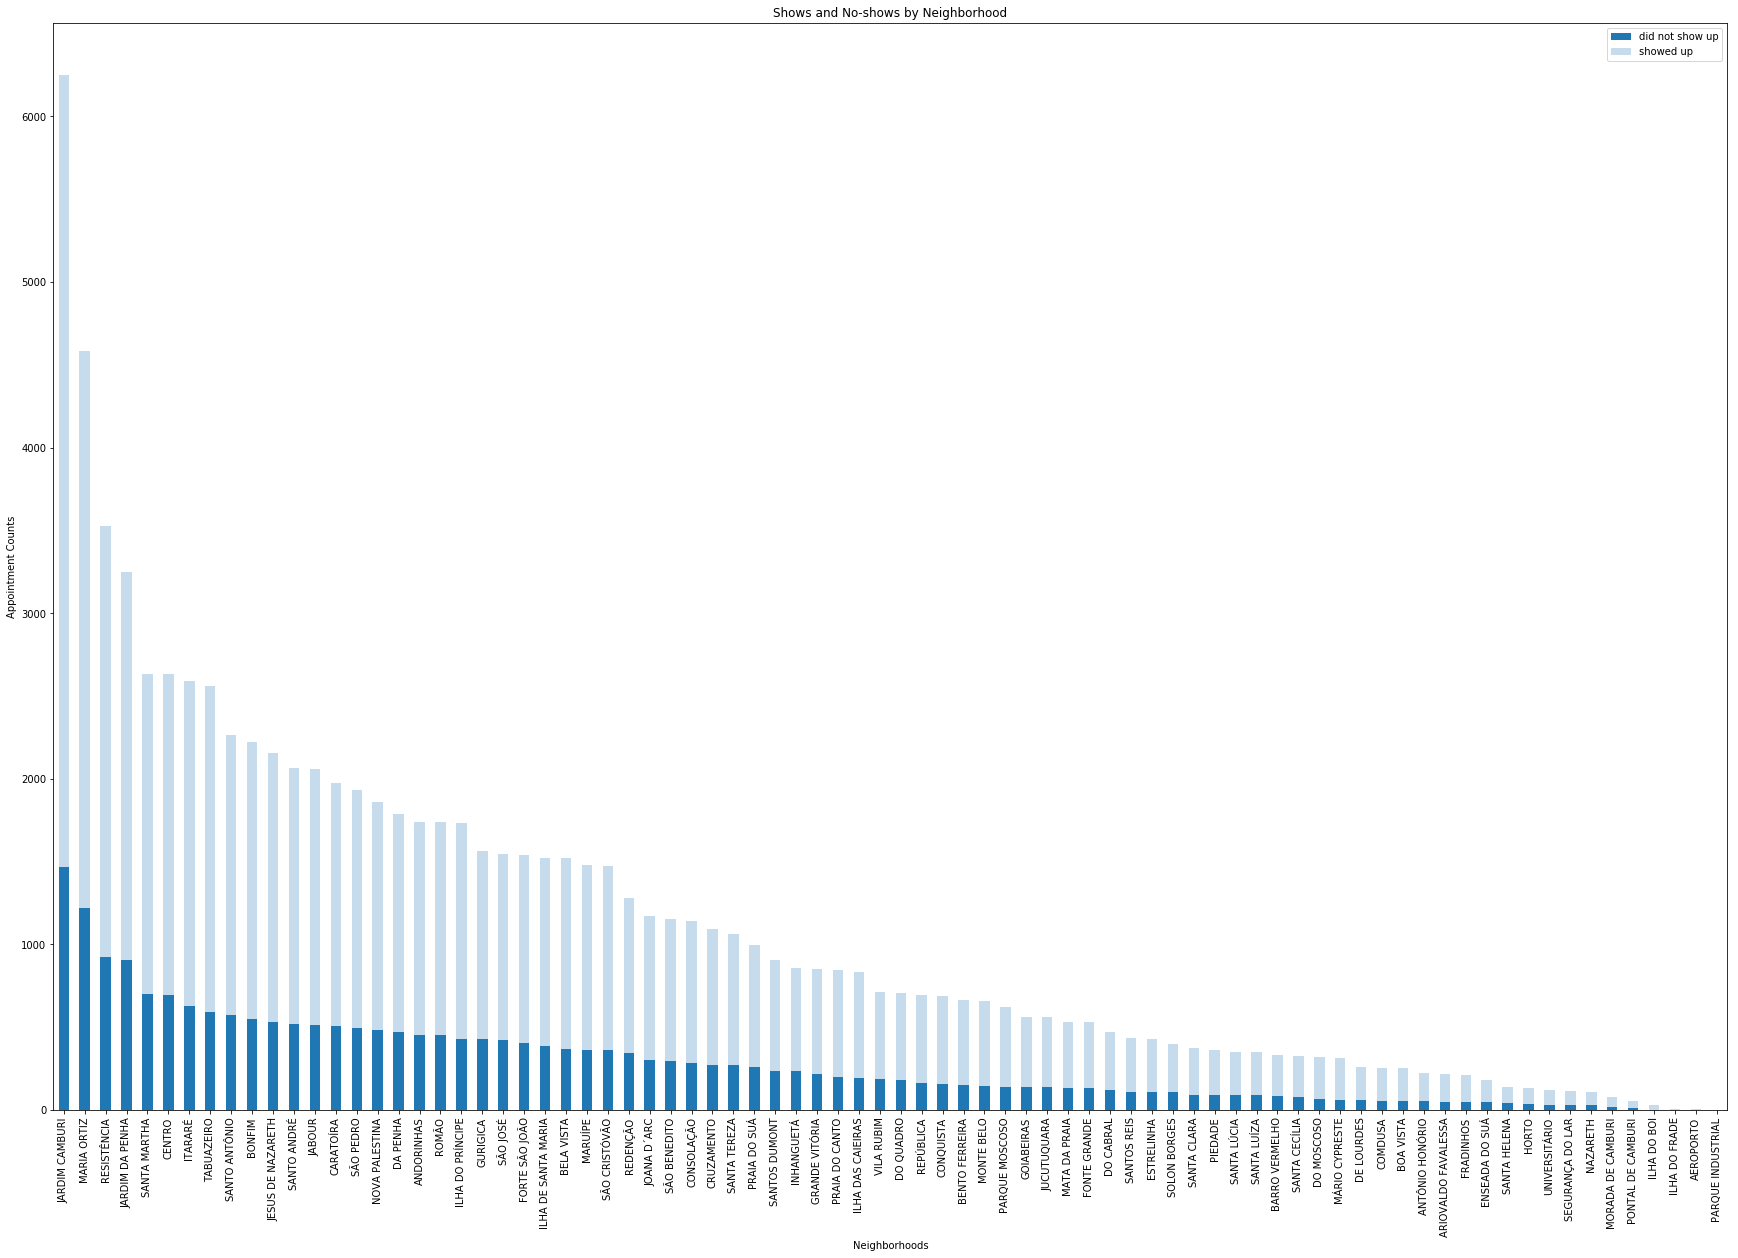

In [155]:
# From the chart above, I see that a few neighborhoods have a very high number of no-shows.  I think this may be
# because these neighborhoods may have a higher number of appointments overall.  I want to plot the number of no-shows
# against the total number appointments in which the patient did show up.
neighborhood_ns = df.neighborhood[did_not_show]
neighborhood_s = df.neighborhood[showed]

ax = neighborhood_ns.value_counts().plot(kind='bar', alpha=1, label='did not show up', figsize=(30,20), 
                                         legend=True, title="Shows and No-shows by Neighborhood")
neighborhood_s.value_counts().plot(kind='bar', alpha=0.25, label='showed up', legend=True)
ax.set_xlabel('Neighborhoods')
ax.set_ylabel('Appointment Counts');

In [156]:
# From the bar graph above, you can see that neighborhoods such as 
# Jardim Camburi and Maria Ortiz have a higher number of no-shows, but they also have
# a higher number of appointments overall.

### Research Question 3
Is there a day of the week corresponds to a statistically higher proportion of no-shows?

In [157]:
# To answer the question, I want to turn the 'appointment_day' column into 
# a format that tells me what day of the week it corresponds to and I will
# store this in a new column called 'appointment_dow'.
# I will do this for the 'appointment_day' column as well for consistency.

df['appointment_dow'] = df['appointment_day'].map(pd.to_datetime)
df['appointment_dow'] = df['appointment_dow'].dt.weekday_name

In [158]:
# Checking to see that changes above took place.
df.head()

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighborhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show,appointment_dow
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,0,Friday
1,5.589980e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,0,Friday
2,4.262960e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,0,Friday
3,8.679510e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0,Friday
4,8.841190e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,0,Friday


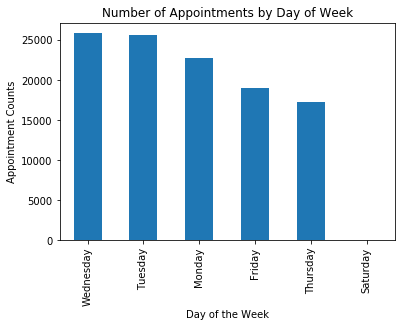

In [159]:
# Getting idea of number of scheduled appointments per day of week.
# Notice that there are no Sunday appointments and barely any appointments
# on Saturday.
ax = df['appointment_dow'].value_counts().plot(kind='bar', title='Number of Appointments by Day of Week')

ax.set_xlabel('Day of the Week')
ax.set_ylabel('Appointment Counts');

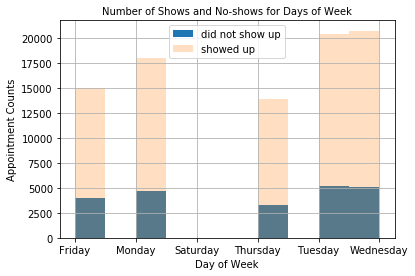

In [160]:
# Visually displaying shows and no-shows for each day of the week.
# Notice that there are the fewest appointments made during Thursday and
# the most appointments made during Tuesday and Wednesday.
# toward the end of the week (Thursday, Friday, and Saturday).
ax = df.appointment_dow[did_not_show].hist(alpha=1, label='did not show up')
df.appointment_dow[showed].hist(alpha=0.25, label='showed up')

ax.set_xlabel('Day of Week')
ax.set_ylabel('Appointment Counts')

plt.title('Number of Shows and No-shows for Days of Week', fontsize=10)
plt.legend();

# ax = neighborhood_ns.value_counts().plot(kind='bar', alpha=1, label='did not show up', figsize=(30,20), legend=True)
# neighborhood_s.value_counts().plot(kind='bar', alpha=0.25, label='showed up', legend=True)
# ax.set_xlabel('Neighborhoods')
# ax.set_ylabel('Appointment Counts');

### Research Question 4
What is the distribution of no-shows across the ages?

In [161]:
# I want to start by creating a data frame that is made up only of all no-shows.
# I'll also create another dataframe made up only of all appointments in which 
# the patient did show up.  I'll do this to make comparisons between the two.
df_ns_only = df[df['no_show'] == 1]
df_s_only = df[df['no_show'] == 0]

In [162]:
# Now I'm taking the counts of each unique age from both dataframes 
# and renaming the columns to a more appropriate label.
# I'll use these for my scatter plot.
df_ns_counts = df_ns_only.age.value_counts().reset_index().rename(columns={'index': 'age', 'age': 'count'})
df_s_counts = df_s_only.age.value_counts().reset_index().rename(columns={'index': 'age', 'age': 'count'})

In [163]:
# I'm checking to make sure the changes above make sense.
df_ns_counts.head()

,age,count
0,0,639
1,1,415
2,17,396
3,19,394
4,30,369


In [164]:
df_s_counts.head()

,age,count
0,0,2900
1,1,1858
2,52,1449
3,56,1372
4,2,1366


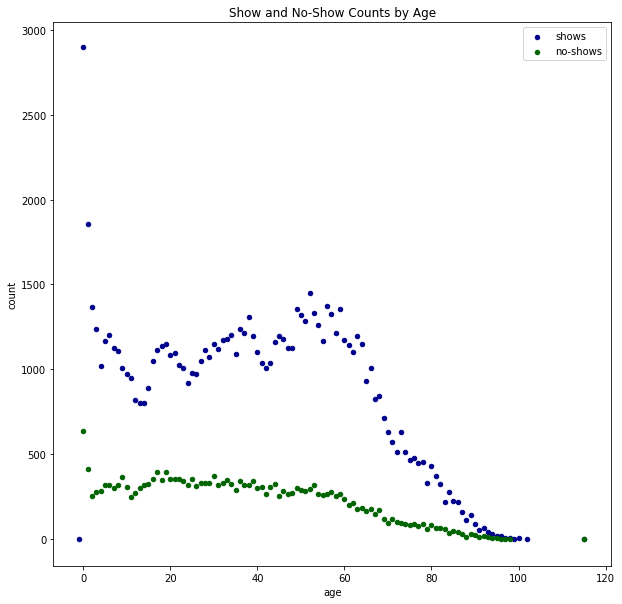

In [165]:
# This is how I set up my scatter plot.  I decided to show both distributions
# for both shows and no-shows in one figure to help compare the two.
ax = df_s_counts.plot(kind='scatter', x='age', y='count', 
                      color='DarkBlue', label='shows', figsize=(10,10), title="Show and No-Show Counts by Age");

df_ns_counts.plot(kind='scatter', x='age', y='count', 
                  color='DarkGreen', label='no-shows', ax=ax);

# Source: http://pandas.pydata.org/pandas-docs/version/0.15.0/visualization.html#scatter-plot


In [166]:
# Both the shows and no-shows generally decrease after about age 60.
# The decrease in shows drops more dramatically than the decrease in no-shows
# after about age 60.

<a id='conclusions'></a>
## Conclusions

I began by getting an idea about the information contained in the dataset. Then, I checked the data for null values and duplicates, and also edited the names of the columns. Afterwards, I used the data to investigate four research questions that looked at whether certain variables were associated with patient no-shows.  The variables I looked at were gender, neighborhood, the day of the week that the appointment took place, and age.

For gender, females made up a higher percentage of all appointments but both males and females seemed to be no-shows at about the same rate.

There were some neighborhoods that had a higher proportion of overall appointments, but when looking at the no-shows, all neighborhoods seem to have about the same rate of no-shows.

As for the days of the week, the data revealed very few appointments made for Saturdays. The 2nd to least popular day for appointments was Thursday. The two most popular days of the week to make appointments were Tuesday and Wednesday. The rate of no-shows for each of the days was about the same.

Finally, for age, the number of both shows and no-shows show a steady decline after about age 60.  However, the decline for shows is much steeper which may suggest that, after age 60, the likelihood of a patient being a no-show increases.

Some limitations to this study include not having a large enough sampling of appointments in certain neighborhoods to determine the rate of no-shows . For example, Parque Industrial only shows up once in this dataset. This is also true for some of the ages especially at the higher end (90+). It's also unusual that out of over one hundred thousand appointments, there are only 39 Saturdays in which there are reported appointments. This may reflect a mistake in how the data was collected or reported.

In [167]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0